In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# ***Handling missing values***

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

<ipython-input-7-26113ea9078d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [8]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)

<ipython-input-9-c2c4bad63410>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)


In [10]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
df.dropna(subset='Embarked',inplace=True)

In [12]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## ***Converting categorical features into numerical using encoding***

In [13]:
from sklearn.preprocessing import LabelEncoder
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [14]:
encoder = LabelEncoder()

In [15]:
df['Sex'] = encoder.fit_transform(df['Sex'])

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,S


In [17]:
df['Embarked'] = encoder.fit_transform(df['Embarked'])

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,2


# ***passengerId,cabin,name,ticket columns are not very important for this dataset,so i simply removing them from the table***

In [19]:
df.drop(columns=['Cabin','Name','Ticket','PassengerId'],inplace=True)

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [21]:
X = df.drop(columns='Survived')
y = df['Survived']

In [22]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


# ***Standardization***

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.590495,0.431350,-0.474326,-0.500240,2
1,1,1,0,0.643971,0.431350,-0.474326,0.788947,0
2,1,3,0,-0.281878,-0.475199,-0.474326,-0.486650,2
3,1,1,0,0.412509,0.431350,-0.474326,0.422861,2
4,0,3,1,0.412509,-0.475199,-0.474326,-0.484133,2


In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.590495,0.431350,-0.474326,-0.500240,2
1,1,1,0,0.643971,0.431350,-0.474326,0.788947,0
2,1,3,0,-0.281878,-0.475199,-0.474326,-0.486650,2
3,1,1,0,0.412509,0.431350,-0.474326,0.422861,2
4,0,3,1,0.412509,-0.475199,-0.474326,-0.484133,2


# ***Box Plot to Visualize Outliers***

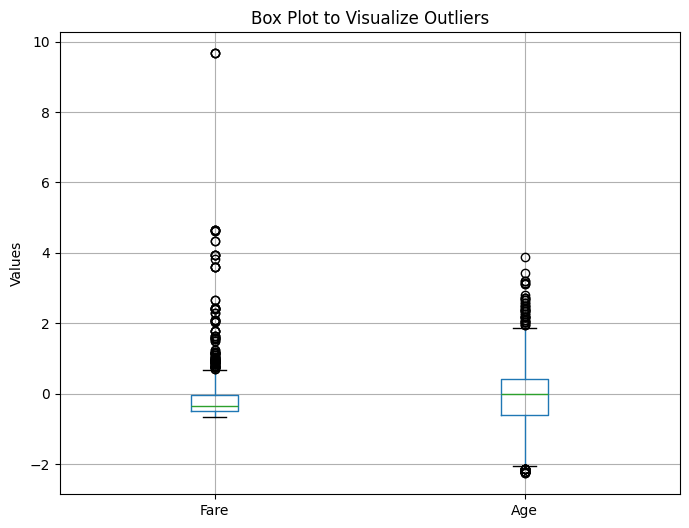

In [27]:
columns_to_visualize = ['Fare', 'Age']

df[columns_to_visualize].boxplot(figsize=(8, 6))
plt.title('Box Plot to Visualize Outliers')
plt.ylabel('Values')
plt.show()

In [57]:
Q1 = df['Fare'].quantile(0.25)  # 25th percentile
Q3 = df['Fare'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

In [56]:
Q1_ = df['Age'].quantile(0.25)  # 25th percentile
Q3_ = df['Age'].quantile(0.75)  # 75th percentile
IQR_ = Q3_ - Q1_

lower_bound_ = Q1_ - 1.5 * IQR_
upper_bound_ = Q3_ + 1.5 *  IQR_

df = df[(df['Age'] >= lower_bound_) & (df['Age'] <= upper_bound_)]

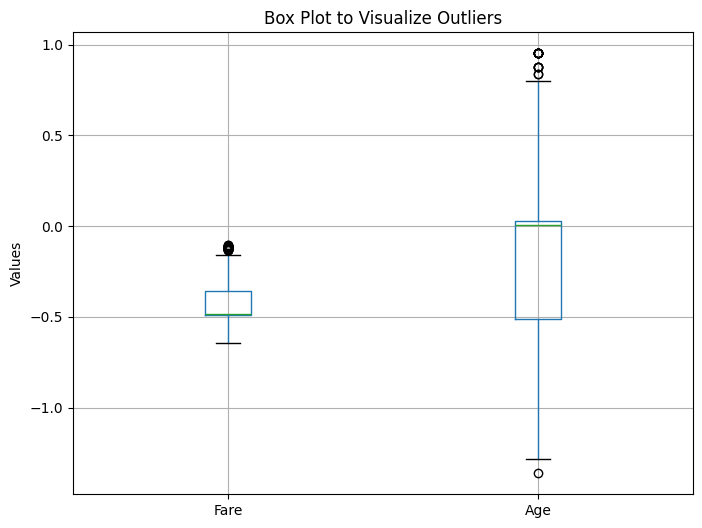

In [58]:
columns_to_visualize = ['Fare', 'Age']

df[columns_to_visualize].boxplot(figsize=(8, 6))
plt.title('Box Plot to Visualize Outliers')
plt.ylabel('Values')
plt.show()

In [59]:
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]
Index: []


In [61]:
outliers = df[(df['Age'] < lower_bound_) | (df['Age'] > upper_bound_)]
print(outliers)

Empty DataFrame
Columns: [Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]
Index: []
